## Векторная модель текста в NLTK
### Задание 1
Возьмем файл alice.txt с прошлого семинара. Мы уже научились разбивать его на токены и удалять стоп-слова.
Используя nltk.FreqDist, выведите 20 самых часто встречающихся слов в тексте (не удаляя стоп символы).

Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Сколько не стоп-слов среди первых десяти?
    Сколько раз встречается слово "крокет"? (понятно, что оно не входит в top20)


In [1]:
s = ""
with open("alice.txt") as infile:
    for line in infile:
        s += line.strip() + ' '
from nltk.corpus import stopwords
from string import punctuation
# noise = set(stopwords.words('russian') + list(punctuation) + ["–", "»", "«"])
from nltk.tokenize import word_tokenize
tokenized = word_tokenize(s)

In [2]:
l1 = list(map(lambda x: x.lower(), tokenized))
import nltk

d1 = nltk.FreqDist(l1)
d1.most_common(20)

[(',', 3381),
 ('-', 1953),
 ('.', 1120),
 ('!', 1023),
 ('и', 1021),
 ('не', 700),
 ('в', 490),
 ('что', 446),
 ('она', 372),
 ('?', 365),
 ('алиса', 363),
 ('на', 362),
 ('я', 341),
 ('а', 301),
 ('как', 275),
 (':', 268),
 ('это', 261),
 ('с', 231),
 ('все', 218),
 ('так', 206)]

In [3]:
# 1. 
print("В1. Какое слово стоит на 1 месте? Ответ:", d1.most_common(100)[0][0])

В1. Какое слово стоит на 1 месте? Ответ: ,


In [4]:
# 2. 
print("В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ:", d1.most_common(100)[19][1])

В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ: 206


In [5]:
# 3. 
top10 = [word[0] for word in d1.most_common(10)]
print("Топ 10 слов:\n", top10)
top10without_stop_words = [word for word in top10 if word not in stopwords.words('russian')]
print("Топ 10 слов, без стоп слов:\n", top10without_stop_words)
print("\nВ3. Сколько не стоп-слов среди первых десяти? Ответ:", len(top10without_stop_words))

Топ 10 слов:
 [',', '-', '.', '!', 'и', 'не', 'в', 'что', 'она', '?']
Топ 10 слов, без стоп слов:
 [',', '-', '.', '!', '?']

В3. Сколько не стоп-слов среди первых десяти? Ответ: 5


In [6]:
# 4. 
print("В4. Сколько раз встречается слово 'крокет'? Ответ:", dict(d1)["крокет"])

В4. Сколько раз встречается слово 'крокет'? Ответ: 9


### Задание 2
Избавьтесь от стоп-слов с помощью списка stopwords из nltk.corpus. Используйте pymorphy2 или Mystem, чтобы привести слова к нормальной форме. Ответьте на вопросы:

    Какое слово стоит на 1 месте?
    Сколько раз встречается слово, стоящее на 20 месте?
    Остались ли какие-то стоп-слова среди первых 10? 20?
    Сколько раз встречается слово "крокет"? Почему результат изменился?


In [7]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
l3 = [morph.parse(token)[0].normal_form for token in l1 if not token in stopwords.words('russian')]
d3 = nltk.FreqDist(l3)
d3.most_common(20)

[(',', 3381),
 ('-', 1953),
 ('.', 1120),
 ('!', 1023),
 ('алиса', 420),
 ('?', 365),
 ('сказать', 313),
 ('это', 271),
 (':', 268),
 ('``', 200),
 ("''", 189),
 ('...', 182),
 (')', 113),
 ('(', 112),
 ('такой', 100),
 ('очень', 91),
 ('один', 87),
 (';', 83),
 ('свой', 76),
 ('слово', 74)]

Давайте пострим кумулятивный график частот слов. Как он выглядит и почему так? Попробуйте поменять количество слов, какие тенденции вы видите?


In [8]:
# 1. 
print("В1. Какое слово стоит на 1 месте? Ответ:", d3.most_common(100)[0][0])

В1. Какое слово стоит на 1 месте? Ответ: ,


In [9]:
# 2. 
print("В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ:", d3.most_common(100)[19][1])

В2. Сколько раз встречается слово, стоящее на 20 месте? Ответ: 74


In [10]:
# 3. 
stop_inside = [word[0] for word in d3.most_common(20) if word[0] in stopwords.words('russian')]
print("Оставшиеся стоп слова:", stop_inside)
print("В3. Остались ли какие-то стоп-слова среди первых 10? 20? Ответ:", "Да" if len(stop_inside) else "Нет")

Оставшиеся стоп слова: ['такой', 'один']
В3. Остались ли какие-то стоп-слова среди первых 10? 20? Ответ: Да


In [11]:
# 4. 
for word in l1:
    if word.find("крокет") != -1 and word != "крокет" and morph.parse(word)[0].normal_form == "крокет":
        answer = word + " -> " + morph.parse(word)[0].normal_form

print('В4-1. Сколько раз встречается слово "крокет"? Ответ:', dict(d3)["крокет"])
print("В4-2. Почему результат изменился? Ответ:", answer)

В4-1. Сколько раз встречается слово "крокет"? Ответ: 11
В4-2. Почему результат изменился? Ответ: крокете -> крокет


In [12]:
d3.plot(30, cumulative = True)

<Figure size 640x480 with 1 Axes>

### Задание 3

Найдите распределение длин слов в тексте, выведите top5 и ответьте на вопросы:

    Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)?
    Слов какой длины в тексте больше всего?
    Какую долю занимают слова этой длины?
    Сколько слов длины 1?

Выведите в алфавитном поредке длинные слова (длиннее 15 символов).

    Сколько их?

In [13]:
fdist = nltk.FreqDist(len(w) for w in l1)  
print(fdist)  
print (fdist.most_common(5))

<FreqDist with 21 samples and 35180 outcomes>
[(1, 11103), (3, 4036), (5, 3573), (2, 3496), (6, 3119)]


In [14]:
long_words = [w for w in l1 if len(w) > 15]
print(sorted(long_words))
print("Сколько их? Ответ:", len(long_words))

['-сказалагерцогиня.-фламинго', 'алиса-пожалуйста', 'воспользовавшись', 'воспользовавшись', 'деликате-е-есной', 'деликате-е-есной', 'докакого-нибудьберега-', 'душечка-дорогушечка', 'жизнерадостностью', 'заинтересовалась', 'заинтересовалась', 'заинтересованная', 'подобру-поздорову', 'полетела-полетела', 'полюбопытствовать', 'попрактиковаться', 'предусмотрительная', 'угова-а-а-а-ривают', 'честное-пречестное', 'швейцар-головастик', 'швейцар-головастик', 'шиворот-навыворот', 'энциклопедический']
Сколько их? Ответ: 23


In [15]:
# 1.
print("Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)? Ответ:", len(fdist))

Сколько всего в данном тексте вариантов длин слов (вместе со стоп-словами)? Ответ: 21


In [16]:
# 2. 
sorted_by_length = sorted(fdist.most_common(None), key=lambda x: x[1], reverse=True)
print("Слов какой длины в тексте больше всего? Ответ:", sorted_by_length[0][0])

Слов какой длины в тексте больше всего? Ответ: 1


In [17]:
# 3. 
answer = sorted_by_length[0][1] / (sum([_[1] for _ in sorted_by_length]))
print("Какую долю занимают слова этой длины? Ответ:", round(answer, 2))

Какую долю занимают слова этой длины? Ответ: 0.32


### Задание 4

Превратите строку в NLTK-текст и проверьте, как работают спецфункции, на собственных примерах.


In [18]:
text = nltk.Text(l1)
# A concordance view shows us every occurrence of a given word, together with some context
print (text.concordance("он"))
print("********" * 10)
# Using similar(token) returns a list of words that appear in the same context as token. 
# In this case the the context is just the words directly on either side of token.
print (text.similar('он'))
print("********" * 10)
# The term common_contexts allows us to examine just the contexts that are shared by two or more words
print (text.common_contexts(["алиса", "он"]))
print("********" * 10)
# A collocation is a sequence of words that occur together unusually often.
print (text.collocations(30))

Displaying 25 of 172 matches:
, у которого огромное чувство юмора - он может захохотать , когда никому друго
идет улыбнуться . любимая его шутка ( он сам ее придумал ) такая : - андрюшень
не улыбнется . а все дело в том , что он очень плохо знаком с повадками ихтиоз
век . да и то неизвестно , сочинил бы он ее или нет , если бы не одна маленька
 знакомого , мистера доджсона , чтобы он рассказал ей и ее сестрам интересную 
ень уже сильно устал , - послушался . он начал рассказывать сказку о приключен
выдумал ! ) , - прекрасно знала , что он вовсе не такой и все это неправда ! р
ым такого необыкновенного выдумщика ! он выдумывал не только сказки - он выдум
ика ! он выдумывал не только сказки - он выдумывал головоломки , загадки , игр
из них играют и до сих пор . ( именно он придумал веселую игру , которая назыв
 , только не на уроках ! ) . особенно он любил и умел играть ... словами . сам
ом , бог знает что выделывали ! и еще он умел переделывать старые , надоевшие 
я ( чарльз лютвидж , в

## Эмбеддинги


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')
random.seed(1228)

%matplotlib inline

Скачиваем куски датасета твитов ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/ilkte35m35l38mr/negative.sql).

In [20]:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0

--2019-06-02 03:57:00--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/fnpq3z4bcnoktiv/positive.csv [переход]
--2019-06-02 03:57:00--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uc1871404bc042605e09953851da.dl.dropboxusercontent.com/cd/0/inline/AiC3mGGbeCPEHsaXYN2H1nTfOxVx6Qr4kib_DQ9BC2DRENoprPFlesyQWHlivefxr_zthb8RsRwXQzDeWQGUtS0VQrQ7SCnCkloP-Y04ZeQzuA/file# [переход]
--2019-06-02 03:57:00--  https://uc1871404bc042605e09953851da.dl.dropboxusercontent.com/cd/0/inline/AiC3mGGbeCPEHsaXYN2H1nTfOxVx6Qr4kib_DQ9BC2DRENoprPFlesyQWHlivefxr_zthb8RsRwXQzDeWQGUtS0VQrQ7SCnCkloP-Y04ZeQzuA/file
Распознаётся uc1871404bc04260

In [21]:
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0

--2019-06-02 03:57:08--  https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/r6u59ljhhjdg6j0/negative.csv [переход]
--2019-06-02 03:57:08--  https://www.dropbox.com/s/raw/r6u59ljhhjdg6j0/negative.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uc268cf4b6e7c02331a8d6970671.dl.dropboxusercontent.com/cd/0/inline/AiAfqHk5Mw98nJAfnKb10j7MlC2xc8YKhK5hNW-Wp_cor0_h4QOvqwOmUI8_xV3atfMXXO3IoIk1h-x553_LQNvfcND1f1DC9EoHmGY0D1eMCg/file# [переход]
--2019-06-02 03:57:08--  https://uc268cf4b6e7c02331a8d6970671.dl.dropboxusercontent.com/cd/0/inline/AiAfqHk5Mw98nJAfnKb10j7MlC2xc8YKhK5hNW-Wp_cor0_h4QOvqwOmUI8_xV3atfMXXO3IoIk1h-x553_LQNvfcND1f1DC9EoHmGY0D1eMCg/file
Распознаётся uc268cf4b6e7c023

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [22]:
from pymystem3 import Mystem
import re


m = Mystem()


regex = re.compile("[А-Яа-я:=!\)\()A-z\_\%/|]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [23]:
df_neg = pd.read_csv("negative.csv?dl=0", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("positive.csv?dl=0", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df_pos['text'] = df_pos[3]
df_neg['text'] = df_neg[3]
df = pd.concat([df_neg, df_pos])
df = df[['text', 'sent']]
%time df.text = df.text.apply(words_only)
%time df.text = df.text.apply(lemmatize)

CPU times: user 1.7 s, sys: 101 ms, total: 1.8 s
Wall time: 1.9 s
CPU times: user 32.4 s, sys: 4.8 s, total: 37.2 s
Wall time: 4min 20s


In [24]:
print(df.shape)
df.head()

(226834, 2)


,text,sent
0,на работа быть полный пиддеса :| и так каждый ...,neg
1,коллега сидеть рубиться в Urban terror а я из ...,neg
2,elina_ post как говорить обещаной три год ждат...,neg
3,желать хороший пол тот и удачный посадка я быт...,neg
4,обновлять за какой то леший surf теперь не раб...,neg


In [25]:
df.tail()

,text,sent
114906,спать в родительский дом на свой кровать просы...,pos
114907,RT jebesilofyt: эх мы немного решать сокращать...,pos
114908,что происходить со я когда в эфир proactivefm ...,pos
114909,любимый я подарить ты этот звезда имя какой зв...,pos
114910,Ma_che_rie посмотреть непытайтесьпокинутьомск ...,pos


In [26]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

### Обучение модели в gensim

In [27]:
texts[0]

['на',
 'работа',
 'быть',
 'полный',
 'пиддеса',
 ':|',
 'и',
 'так',
 'каждый',
 'закрытие',
 'месяц',
 'я',
 'же',
 'свихиваться',
 'так',
 'D:']

In [28]:
!pip3 install -U gensim

Requirement already up-to-date: gensim in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages (3.7.3)


In [29]:
# %%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=100, window=5, min_count=5, workers=4)
model.save("word2v.model")

In [30]:
# здесь можно посмотреть все слова, к которым мы имеем вектора
print(model.wv.vocab["она"])

Vocab(count:8163, index:44, sample_int:3782981101)


Загружаем обученную модель (для скорости):

In [31]:
from gensim.models import Word2Vec
model = Word2Vec.load("word2v.model")

Теперь можно воспользjваться функциями поиска похожих / непохожих слов на данное

    model.most_similar
    model.doesnt_match
    etc

In [32]:
model.most_similar("корпоратив")

[('вечеринка', 0.8914819955825806),
 ('утренник', 0.8632736802101135),
 ('ярмарка', 0.8535420894622803),
 ('крещение', 0.8374761343002319),
 ('прокатиться', 0.8368072509765625),
 ('мероприятие', 0.8318315744400024),
 ('ватрушка', 0.8264192938804626),
 ('стадион', 0.8261997699737549),
 ('учеба(', 0.8238264322280884),
 ('сеанс', 0.8210698366165161)]

In [33]:
model.most_similar(positive=["он"], negative=["она"])

[('пух(', 0.25421956181526184),
 ('смайлик', 0.23566216230392456),
 ('друг', 0.2343878597021103),
 ('дремать', 0.20421189069747925),
 ('шредингер', 0.19846394658088684),
 ('список', 0.18191303312778473),
 ('обертываться)', 0.1805555820465088),
 ('земля', 0.1799345761537552),
 ('онлайн', 0.17918598651885986),
 ('каркас', 0.1766592562198639)]

In [34]:
model.doesnt_match("каждый охотник желает знать где сидит фазан".split())

'охотник'

### Задание 5
Выделите top 100 самых частотных слов и получите для них только что обученные вектора

In [35]:
from nltk import FreqDist
all_words = []
for sentence in texts[:5]:
    for word in sentence:
        all_words.append(word)
fd = FreqDist(all_words)


In [36]:
model['рабочий']

array([ 0.02764489, -0.46408352,  0.1661023 ,  0.3548573 , -1.1975195 ,
        0.43120503, -0.02428051, -0.7704628 ,  0.49732655,  0.12164111,
        0.21260458,  0.70217586, -0.7501518 ,  0.40373653, -0.46268374,
        0.32680786, -0.2119748 , -0.53435576, -0.18103185, -0.41628027,
       -2.126985  ,  1.120849  ,  0.08717486,  0.10884415, -0.35158253,
        0.8690765 ,  1.2472793 ,  0.65013164, -0.48475614, -0.8268243 ,
       -0.6388401 ,  0.55683357, -0.09790166,  0.3550729 ,  0.40452406,
        0.11531067,  0.5961858 ,  0.90190965,  0.42709297, -0.93534553,
       -1.5865299 , -0.7586117 ,  1.3210104 ,  0.77238953,  0.48005065,
       -0.53487754, -1.1517093 , -0.9830461 ,  0.6896778 ,  0.13353729,
        0.5245123 ,  1.2440405 ,  0.8832618 ,  0.98653686,  0.10022873,
       -0.8568464 ,  0.3725176 ,  0.5295048 ,  1.8680097 , -0.7733645 ,
       -0.5751248 , -0.09019031, -0.53887445, -0.4589611 , -0.47470805,
       -1.6745011 , -1.0949875 ,  0.20506357,  0.6036908 , -0.80

In [37]:
top_words_vec = []
top_words = []
for word, count in fd.most_common(200):
    if word in model:
        top_words_vec.append(model[word])
        top_words.append(word)
    if len(top_words_vec) == 100:
        break

Визуализируем вектора. Для этого воспользуемся методом снижения размерности t-sne

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [39]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

Теперь нарисуем облако слов

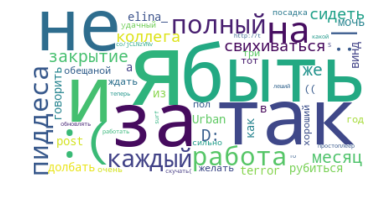

In [40]:
from wordcloud import *
word_freq = [i for i in fd.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Кластеризация слов

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

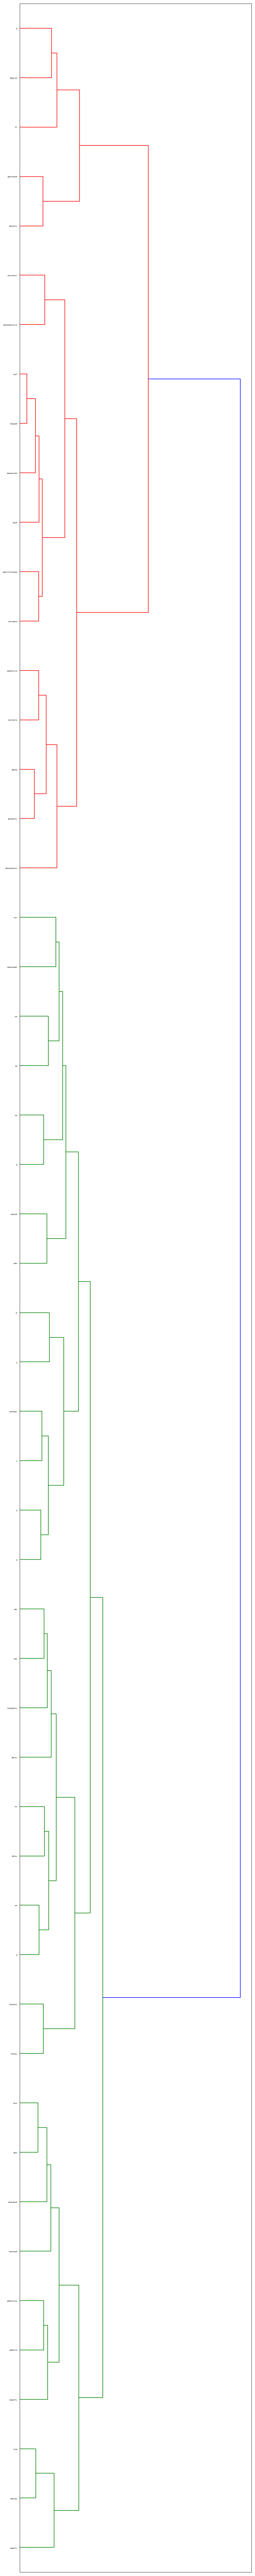

In [42]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

## Языковые модели

### Модели биграм в NLTK

In [43]:
import nltk

In [44]:
names = [name.strip().lower() for name in open('dinos.txt').readlines()]
print(names[:10])

['aachenosaurus', 'aardonyx', 'abdallahsaurus', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acanthopholis', 'achelousaurus', 'acheroraptor']


In [45]:
chars = [char  for name in names for char in name]
freq = nltk.FreqDist(chars)

print(list(freq.keys()))

['a', 'c', 'h', 'e', 'n', 'o', 's', 'u', 'r', 'd', 'y', 'x', 'b', 'l', 'i', 't', 'p', 'v', 'm', 'g', 'f', 'j', 'k', 'w', 'z', 'q']


In [46]:
cfreq = nltk.ConditionalFreqDist(nltk.bigrams(chars))
print(cfreq['a'])

<FreqDist with 26 samples and 2487 outcomes>


In [47]:
cprob = nltk.ConditionalProbDist(cfreq, nltk.MLEProbDist)
print('p(a a) = %1.4f' %cprob['a'].prob('a'))
print('p(a b) = %1.4f' %cprob['a'].prob('b'))
print('p(a u) = %1.4f' %cprob['a'].prob('u'))

p(a a) = 0.0105
p(a b) = 0.0129
p(a u) = 0.3185


In [48]:
l = sum([freq[char] for char in freq])
def unigram_prob(char):
    return freq[char] / l
print('p(a) = %1.4f' %unigram_prob('a'))

p(a) = 0.1354


In [49]:
# можно порождать случайные символы с учётом предыдущих 
cprob['a'].generate()

'u'

### Задание 6

Напишите функцию для генерации нового имени динозавра фиксированной длины.

### Рекуррентные нейронные языковые модели

In [50]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import pdb
from torch.utils.data import Dataset, DataLoader

%load_ext autoreload
%autoreload 2

torch.set_printoptions(linewidth=200)

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
hidden_size = 50

In [52]:
class DinosDataset(Dataset):
    def __init__(self):
        super().__init__()
        with open('dinos.txt') as f:
            content = f.read().lower()
            self.vocab = sorted(set(content))
            self.vocab_size = len(self.vocab)
            self.lines = content.splitlines()
        self.ch_to_idx = {c:i for i, c in enumerate(self.vocab)}
        self.idx_to_ch = {i:c for i, c in enumerate(self.vocab)}
    
    def __getitem__(self, index):
        line = self.lines[index]
        #teacher forcing
        x_str = line
        y_str = line[1:] + '\n'
        x = torch.zeros([len(x_str), self.vocab_size], dtype=torch.float)
        y = torch.empty(len(x_str), dtype=torch.long)
        for i, (x_ch, y_ch) in enumerate(zip(x_str, y_str)):
            x[i][self.ch_to_idx[x_ch]] = 1
            y[i] = self.ch_to_idx[y_ch]
        
        return x, y
    
    def __len__(self):
        return len(self.lines)

In [53]:
trn_ds = DinosDataset()
trn_dl = DataLoader(trn_ds, shuffle=True)

In [54]:
print(trn_ds.lines[1])

aardonyx


In [55]:
print(trn_ds.ch_to_idx)

{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [56]:
x, y = trn_ds[1]
print(x)
print(y)

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])
tensor([ 1, 18,  4, 15, 14, 25, 24,  0])


In [57]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.3)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
    
    def forward(self, h_prev, x):
        combined = torch.cat([h_prev, x], dim = 1) # конкатенируем вектора состояния и входа
        h = torch.tanh(self.dropout(self.i2h(combined)))
        y = self.i2o(combined)
        return h, y

In [58]:
model = RNN(trn_ds.vocab_size, hidden_size, trn_ds.vocab_size).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

In [59]:
def print_sample(sample_idxs):
    [print(trn_ds.idx_to_ch[x], end='') for x in sample_idxs]

In [60]:
def sample(model):
    model.eval()
    word_size=0
    newline_idx = trn_ds.ch_to_idx['\n']
    with torch.no_grad():
        h_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        x = h_prev.new_zeros([1, trn_ds.vocab_size])
        start_char_idx = random.randint(1, trn_ds.vocab_size-1)
        indices = [start_char_idx]
        x[0, start_char_idx] = 1
        predicted_char_idx = start_char_idx
        
        while predicted_char_idx != newline_idx and word_size != 50:
            h_prev, y_pred = model(h_prev, x)
            y_softmax_scores = torch.softmax(y_pred, dim=1)
            
            np.random.seed(np.random.randint(1, 5000))
            idx = np.random.choice(np.arange(trn_ds.vocab_size), p=y_softmax_scores.cpu().numpy().ravel())
            indices.append(idx)
            
            x = (y_pred == y_pred.max(1)[0]).float()
            predicted_char_idx = idx
            
            word_size += 1
        
        if word_size == 50:
            indices.append(newline_idx)
    return indices

In [61]:
def train_one_epoch(model, loss_fn, optimizer):
    model.train()
    for line_num, (x, y) in enumerate(trn_dl):
        loss = 0
        optimizer.zero_grad()
        h_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        x, y = x.to(device), y.to(device)
        for i in range(x.shape[1]):
            h_prev, y_pred = model(h_prev, x[:, i])
            loss += loss_fn(y_pred, y[:, i])
            
        if (line_num+1) % 100 == 0:
            print_sample(sample(model))
        loss.backward()
        optimizer.step()

In [62]:
def train(model, loss_fn, optimizer, dataset='dinos', epochs=1):
    for e in range(1, epochs+1):
        print('Epoch:{}'.format(e))
        train_one_epoch(model, loss_fn, optimizer)
        print()

In [63]:
train(model, loss_fn, optimizer, epochs = 50)

Epoch:1
funnaurcs
lwul
ntaaar
wblilrurssadoes
xeprsxurus
ldtdraugus
xwtlgeurus
osadtoannni
buynlaurus
ziaraaurusaurus
uslxnurus
binakmhrus
cbriaoiiuris
mivotaurus
toriyooosodrul

Epoch:2
crbolrcaur
anius
katansuros
fsngshutus
grtanaerus
betaenuaus
jglasausus
zstroaurus
ijnptaurrs
dargtbasaerus
whbscaurus
sourisassus
irtannanaurus
gariapaurus
vamxsorrus

Epoch:3
gepoiveurus
hhnaisaurur
brnanhluris
yivnuikurus
lonysnoss
xiibgscomnnrus
zigtinaurus
dugotrinaurus
xoptasaerus
xesbdsaarus
urataotiuaos
vilosaurus
muaiicaulus
faeoraurus
gatansaurus

Epoch:4
urcsnusus
brtanoaurus
usactoaaetlr
auboseurus
chlntouhurus
yinaisaurus
brnaoilurus
dlslvchurus
xolysnsus
phnahsaurus
eriaomonias
liuoscsiurus
chyososedrus
hucphsaasaerus
sacrartusos

Epoch:5
qtnersaurus
hubgocaurus
xaasiaaurus
quanusrurus
saurotiurus
nilcgsaurur
wrnaoliurus
givkydeurus
siruuseuras
valtcoratrus
lidsenaurus
ptetsourus
zysipsierus
kucpnrdaures
rumias

Epoch:6
onxsthr
brneosaurus
drcgodaurus
ladooaaurus
rubitaurus
nidiurus
vlrva

crrtfosiurus
furosauans
ylrerloahos
higwinax
thugweeurus
orntturus
ninent
lomtadopaoreen

Epoch:44
trcirrs
mortinaurus
torp
onibhsaurus
hunaeeonatrus
fusesturus
glyoksaurus
betasaurus
lanarhpaurus
bueotpsaurus
gnnsu
melaisaurus
usmbsataia
zaitoteosaurus
fustsiurus

Epoch:45
jioangpb
drnanesapaor
muntesostor
onysaurun
bicisaurus
shnapaurun
lagvotaurus
nothyshosu
zhobgrdauras
epaneonasrus
loserssaurus
usisiuass
xiucospirus
qucporauous
xrapooraurus

Epoch:46
pinosaures
garatahaurus
phlasausus
siuronrolysisaurus
xixdoisamhu
ligsolaurus
sqhrusaurus
osnotpcrup
sicteuaasacrus
anbucaurus
yurngusaurus
craisapaosus
ycsnagnaurus
phtouhutaurus
wyngosimrus

Epoch:47
wseohsaurus
leslgbtgaurus
usus
ckravrrbus
phlansarataps
fanasenaurus
ptdttosaurus
riptocaurus
auguaesg
gngtinaurus
ruchororeurus
erotaph
rctaonoerus
ypbolnaurus
euattoraseusus

Epoch:48
rttaor
kesasaucos
valeshocaurus
natoscrrus
aurnrtasaurus
rataesi
jiatgiccurus
agsurlicurus
lorsapanrus
tetaasaerus
ngboanmurus
quimsrnturus
wangacncoesa

### Задание 7

Измените код выше так, чтобы генерировались панграмы – имена динозавров, не содержащие повторяющихся букв

### Использование LSTM нейронов

In [64]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.linear_f = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_u = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_c = nn.Linear(input_size + hidden_size, hidden_size)
        self.linear_o = nn.Linear(input_size + hidden_size, hidden_size)
        
        self.i2o = nn.Linear(hidden_size, output_size)
        
    def forward(self, c_prev, h_prev, x):
        combined = torch.cat([x, h_prev], 1)
        f = torch.sigmoid(self.linear_f(combined))
        u = torch.sigmoid(self.linear_u(combined))
        c_tilde = torch.tanh(self.linear_c(combined))
        c = f*c_prev + u*c_tilde
        o = torch.sigmoid(self.linear_o(combined))
        h = o*torch.tanh(c)
        y = self.i2o(h)
        
        return c, h, y

In [65]:
model = LSTM(trn_ds.vocab_size, hidden_size, trn_ds.vocab_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [66]:
def sample(model):
    model.eval()
    with torch.no_grad():
        c_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        h_prev = torch.zeros_like(c_prev)
        idx = random.randint(1, 26)
        x = c_prev.new_zeros([1, trn_ds.vocab_size])
        x[0, idx] = 1
        sampled_indexes = [idx]
        n_chars = 1
        newline_char_idx = trn_ds.ch_to_idx['\n']
        while n_chars != 50 and idx != newline_char_idx:
            c_prev, h_prev, y_pred = model(c_prev, h_prev, x)
            
            np.random.seed(np.random.randint(1, 5000))
            idx = np.random.choice(np.arange(trn_ds.vocab_size), p=torch.softmax(y_pred, 1).cpu().numpy().ravel())
            sampled_indexes.append(idx)
            
            x = (y_pred == y_pred.max(1)[0]).float()
            
            n_chars += 1
            
            if n_chars == 50:
                sampled_indexes.append(newline_char_idx)
                
    model.train()
    return sampled_indexes

In [67]:
def train_one_epoch(model, loss_fn, optimizer):
    model.train()
    for line_num, (x, y) in enumerate(trn_dl):
        loss = 0
        optimizer.zero_grad()
        c_prev = torch.zeros([1, hidden_size], dtype=torch.float, device=device)
        h_prev = torch.zeros_like(c_prev)
        x, y = x.to(device), y.to(device)
        for i in range(x.shape[1]):
            c_prev, h_prev, y_pred = model(c_prev, h_prev, x[:, i])
            loss += loss_fn(y_pred, y[:, i])
            
        if (line_num+1) % 100 == 0:
            print_sample(sample(model))
        loss.backward()
        optimizer.step()

In [ ]:
train(model, loss_fn, optimizer, epochs = 50)

Epoch:1
rashs
wcsmaaurus
srarusourus
gerrnytisaurus
xduasgsaurur
kesik
ataiuaurus
zhlppouurus
aahlcaurus
maesobaurus
usamwsiurus
jeronturus
hamianpurus
laskaaurus
euaiusrmaurus

Epoch:2
ronyorauras
palocourus
hiaiesaurus
yuntcrsaurus
kyshoseurus
mocrmtcauras
asghbtanutop
jusngrsaurus
guairaurus
quaesiaaurus
gucgwsaurus
fersruurus
ranteppurus
odriahurus
isanturus

Epoch:3
argesaurus
spuaonasaurus
nbskbiurus
ructortis
irohaurus
tirsaaurus
grltaeiurus
ygmbucaurus
fuslhturus
souranaurus
netaasaurus
pectcaurus
xivngosaurus
traglcaurus
dacsocaurus

Epoch:4
isaruurus
queioseuosaurus
ocioahosaurus
yargharcsaurus
nopaurus
diostarus
mocrosaurus
ohrltor
hkxntfrsosaurus
terotaraurus
wataepm
sieopauras
xiwmsusaurus
qujnsuaaurus
nomtajaurus

Epoch:5
mageocon
volotoolaurus
poroboraurus
gubguianksaurus
suntlaurus
xigxterpt
qiiegrdaurus
glarcurus
damysturus
kerlmuurus
nanmanaurus
gaohaodaurus
whyltlspurus
biysmottauris
ucritbdaurus

Epoch:6
dematapturus
xtxiislvaurus
bhnalsaurus
juabgcsenaueaurus
grsle

### Задание 8

Написать функцию get_prob(), оценивающую веростность порождения одной строки (из файла) и найти самую вероятную строку, порождаемую каждой из трех языковых моделей.

### Задание 9

Используя функцию get_prob(), написать функцию perplexety, оценивающую перплексию каждой из трех языковых моделей.

### Задание 10

Добавить в функцию сэмплирования возможность использовать т.н. температуру. Сейчас сэмплирование следующего символа осуществляется с использованием np.random.choice, где вероятность каждого символа получена на выходе из softmax:

p=torch.softmax(y_pred, 1).cpu().numpy().ravel().

Температура сэмплирования определяется параметром $T$ и преобразует вероятности следующим образом: $p_i = \frac{p_i^{1/T}}{\sum_j p_j^{1/T}}$ .

Проведите эксперименты с разными значениями $T \in [0.5, 1, 2]$. Как разные значения $T$ влияют на генерируемые строки?

### Задание 11

Реализуйте beam search для генерации строк.